# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

Requires a python capable of supporting these libraries, in my case, I am on a conda environment in 3.7.16:
- numpy>=1.17.2
- tensorflow>=2.0
- tqdm>=4.36.1
- argparse>=1.1
- pandas>=0.25.1
- scikit-learn>=0.21.3
- matplotlib>=3.1.1
- protobuf>=3.20.3

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [2]:
# Lire le fichier CSV en sautant la première ligne
df = pd.read_csv("data/co2R.csv", skiprows=1)

# Obtenir la valeur maximale
max_value = float(df.max().values)

# Obtenir la valeur minimale
min_value = float(df.min().values)

# Afficher les résultats
print("Valeur maximale :", max_value)
print("Valeur minimale :", min_value)

Valeur maximale : 366.84
Valeur minimale : 313.18


In [3]:
## Data loading
data_name = 'co2R'
seq_len = 365

if data_name in ['stock', 'energy', 'co2', 'co2V', 'co2R']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 130, 1
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')
ori_data = np.expand_dims(ori_data,2)
print(ori_data.shape)

co2R dataset is ready.
(103, 365, 1)


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [4]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 2500
parameters['batch_size'] = 64

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [5]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Start Embedding Network Training
step: 0/2500, e_loss: 0.2607
step: 500/2500, e_loss: 0.0146
step: 1000/2500, e_loss: 0.0125
step: 1500/2500, e_loss: 0.0103
step: 2000/2500, e_loss: 0.0078
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/2500, s_loss: 0.1335
step: 500/2500, s_loss: 0.0164
step: 1000/2500, s_loss: 0.0105
step: 1500/2500, s_loss: 0.0079
step: 2000/2500, s_loss: 0.0066
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/2500, d_loss: 3.2781, g_loss_u: 0.3659, g_loss_s: 0.0449, g_loss_v: 0.2603, e_loss_t0: 0.1609
step: 500/2500, d_loss: 0.1503, g_loss_u: 3.1215, g_loss_s: 0.0059, g_loss_v: 0.1922, e_loss_t0: 0.0047
step: 1000/2500, d_loss: 0.1503, g_loss_u: 3.1041, g_loss_s: 0.0079, g_loss_v: 0.1041, e_loss_t0:

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [6]:
# metric_iteration = 5

# discriminative_score = list()
# for _ in range(metric_iteration):
#   temp_disc = discriminative_score_metrics(ori_data, generated_data)
#   discriminative_score.append(temp_disc)

# print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [7]:
# predictive_score = list()
# for tt in range(metric_iteration):
#   temp_pred = predictive_score_metrics(ori_data, generated_data)
#   predictive_score.append(temp_pred)   
    
# print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

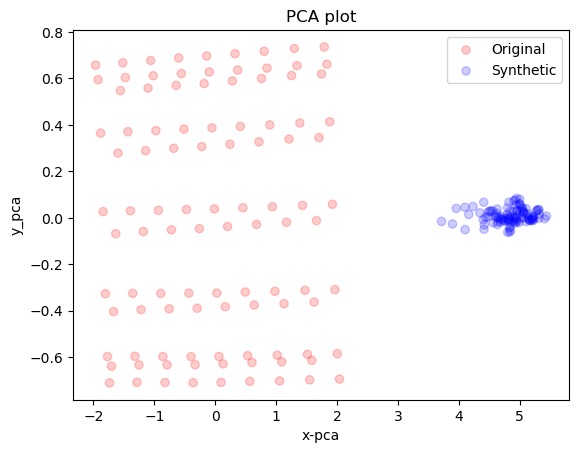

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 206 samples in 0.001s...
[t-SNE] Computed neighbors for 206 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 206 / 206
[t-SNE] Mean sigma: 0.714776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.094173
[t-SNE] KL divergence after 300 iterations: 0.194868


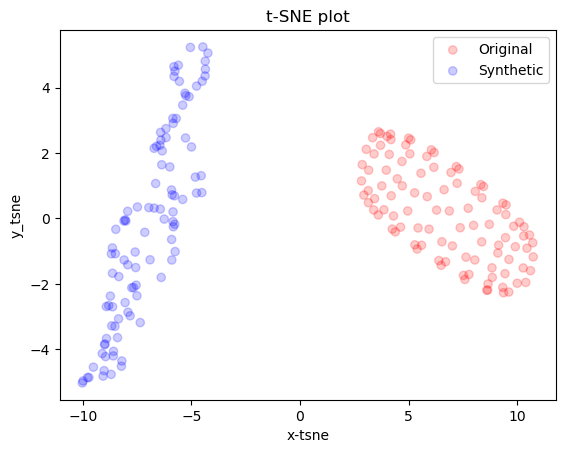

In [8]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

0.6115402876601258
0.6115402876601258
0.6741554193757072
0.6741554193757072
0.7196128167393915
0.7196128167393915
0.7158318127866883
0.7158318127866883
0.5638424500504591
0.6931284988857604
0.6931284988857604
0.6585889300419986
0.6585889300419986
0.7223067237723981
0.7223067237723981
0.5368416276120508
0.8089344538523638
0.8089344538523638
0.7428439599603099
0.7428439599603099
0.7412873680704783
0.7412873680704783
0.6437424848919711
0.6437424848919711
0.6705625315033545
0.6705625315033545
0.73689352359554
0.73689352359554
0.7886746399654507
0.7886746399654507
0.6815326839782339
0.6815326839782339
0.6427267736761372
0.6427267736761372
0.6807558859818323
0.6807558859818323
0.6213103804707019
0.6213103804707019
0.6816672923126045
0.6816672923126045
0.6072236279326895
0.6072236279326895
0.7329499230275974
0.7329499230275974
0.6243039590231464
0.6243039590231464
0.6249718495287322
0.6249718495287322
0.6663782705111402
0.6663782705111402
0.595810111466173
0.6018947659718962
0.601894765971896

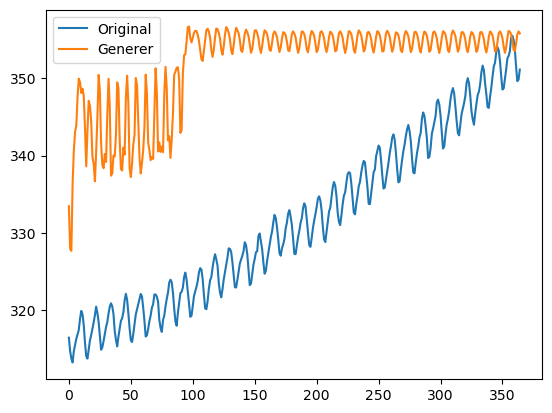

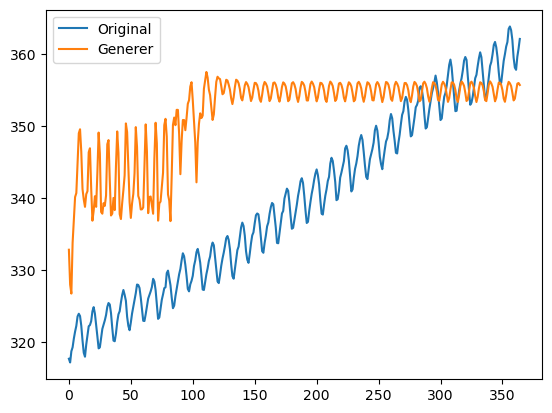

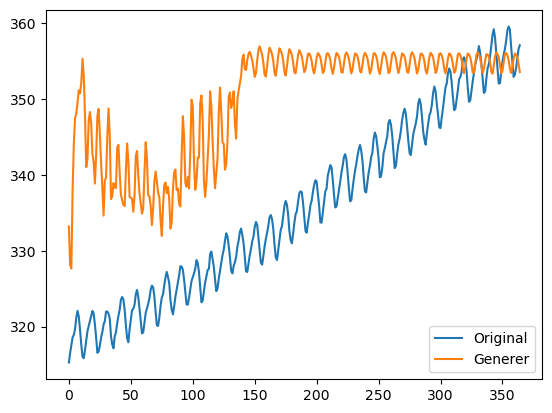

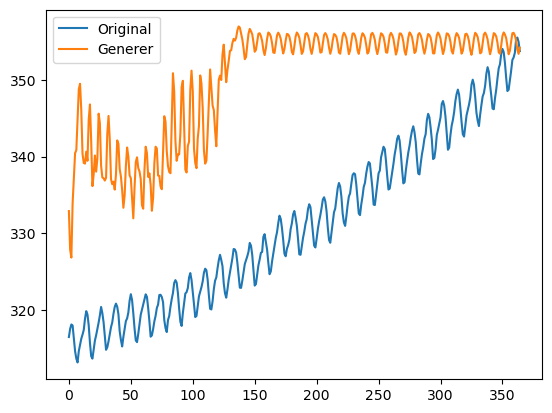

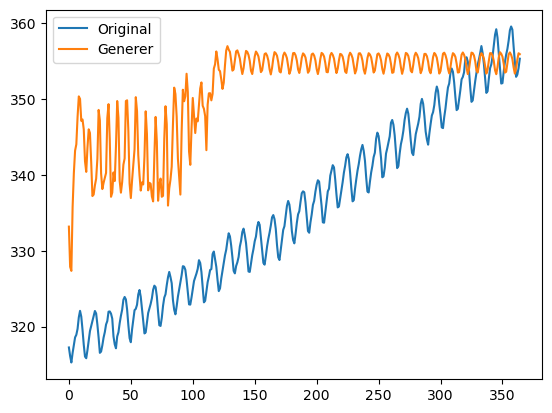

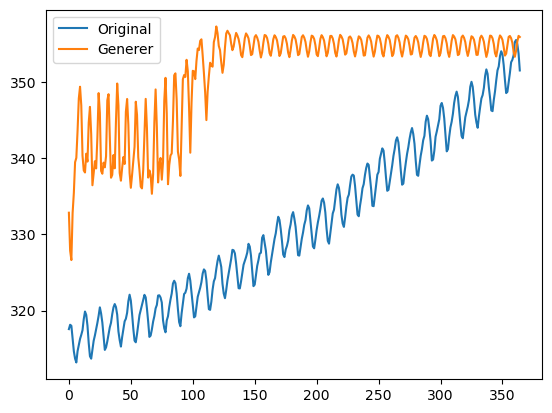

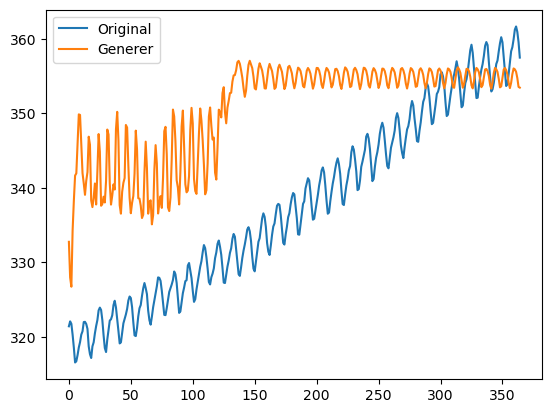

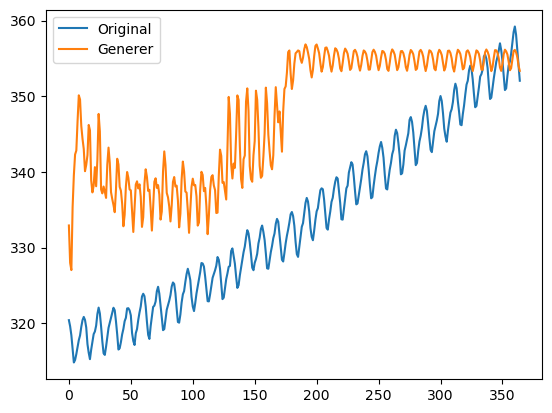

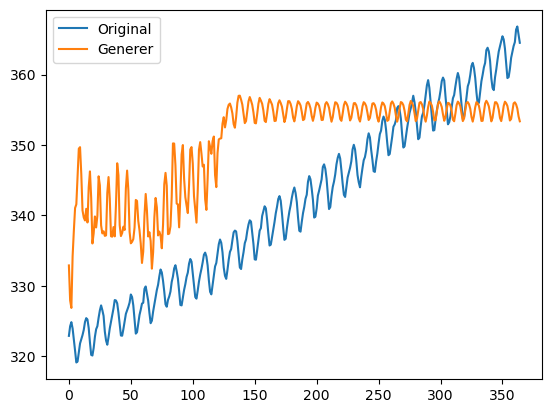

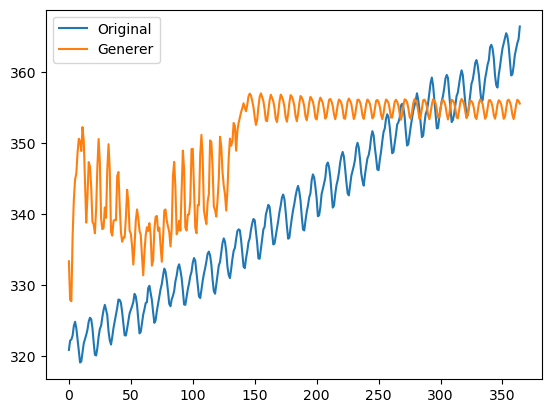

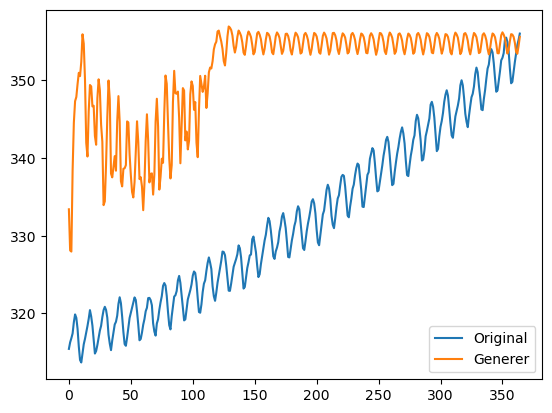

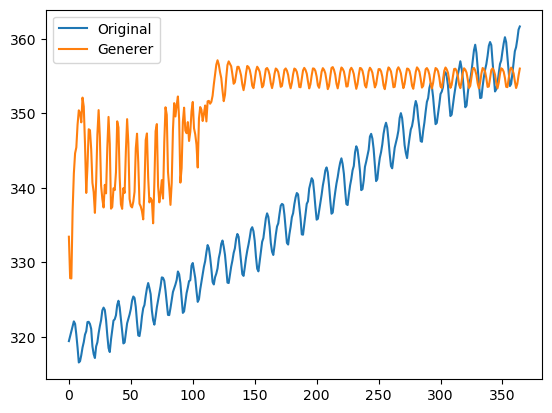

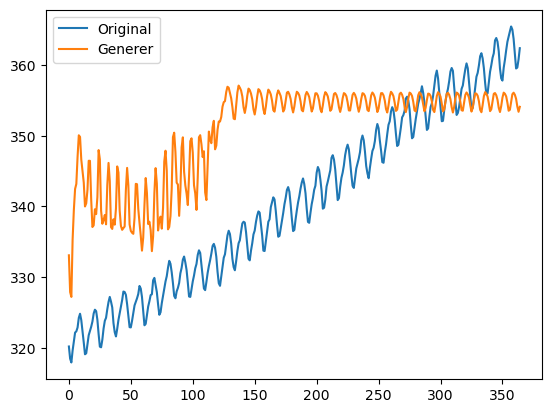

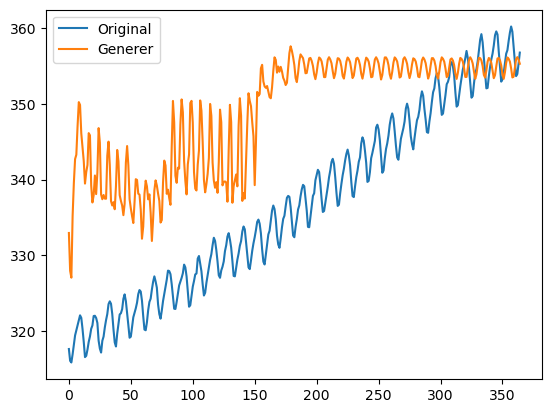

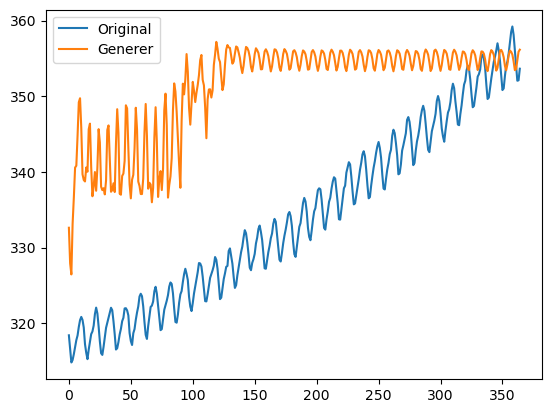

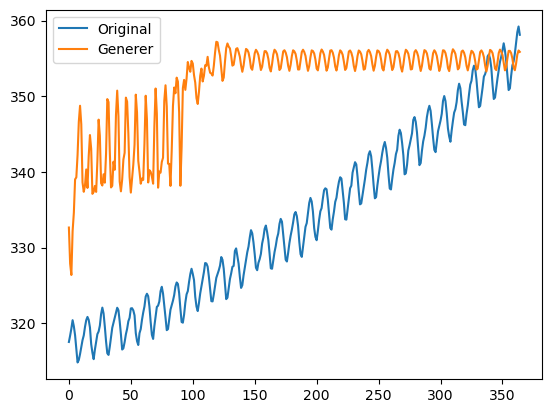

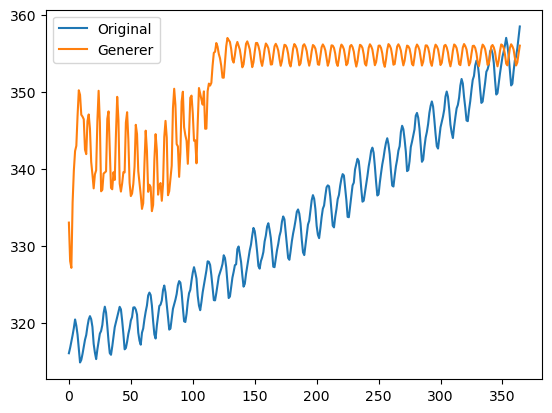

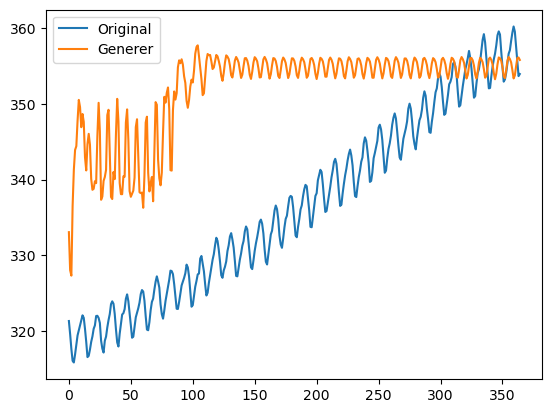

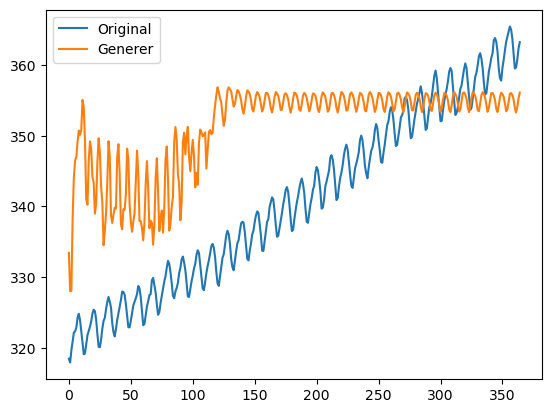

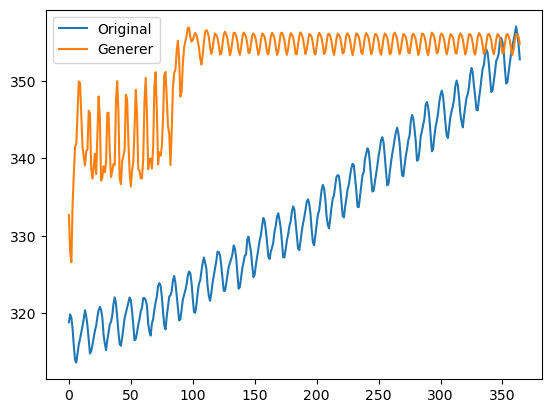

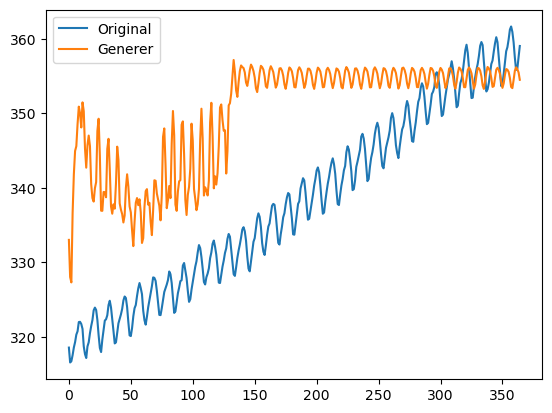

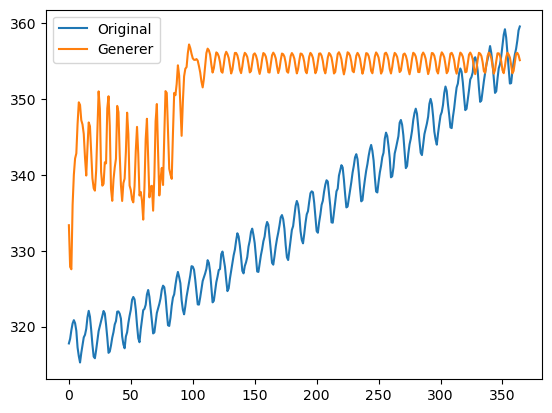

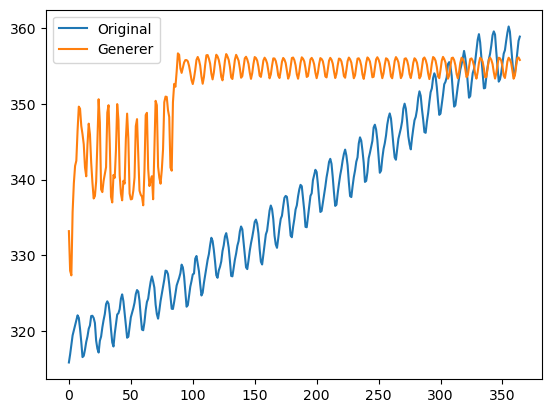

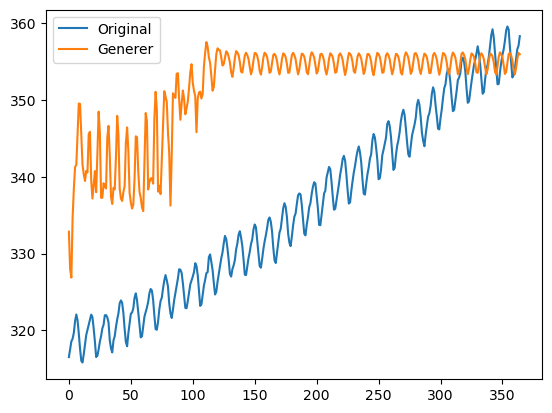

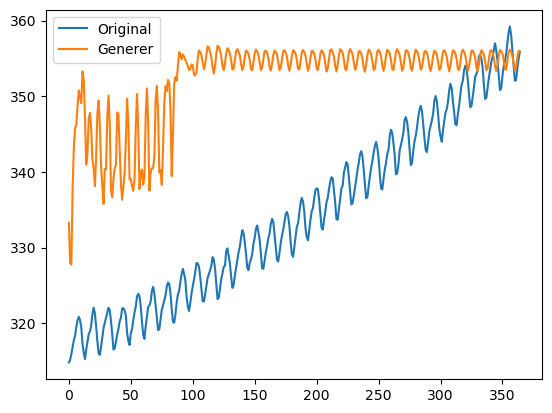

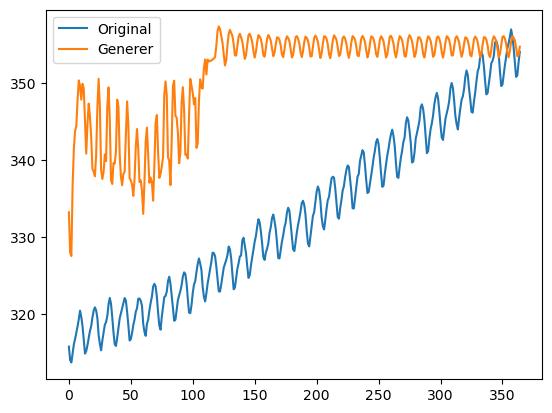

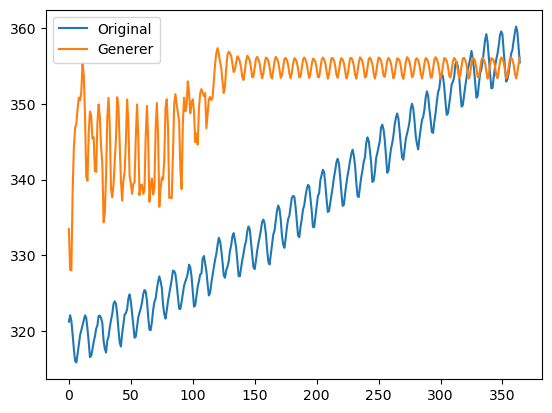

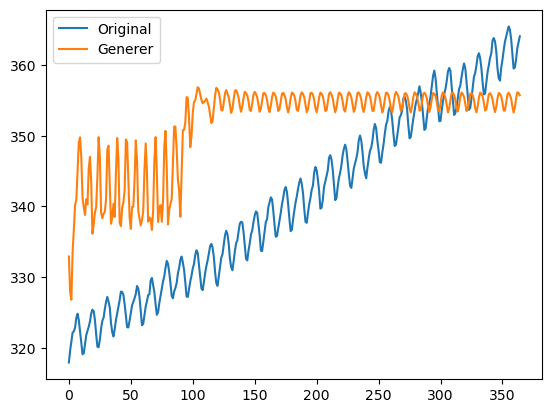

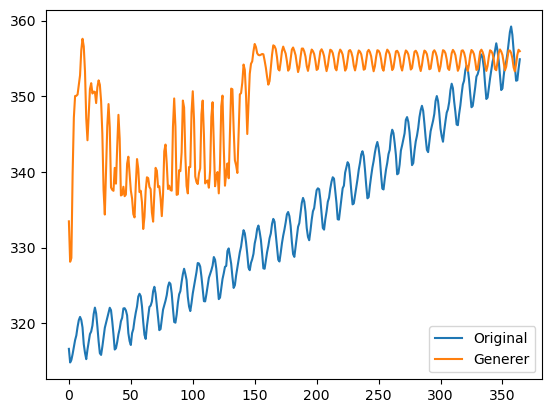

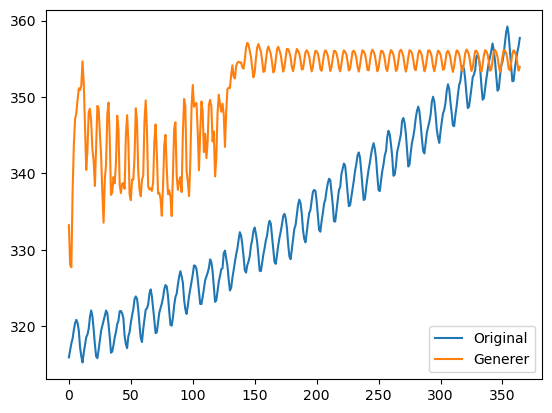

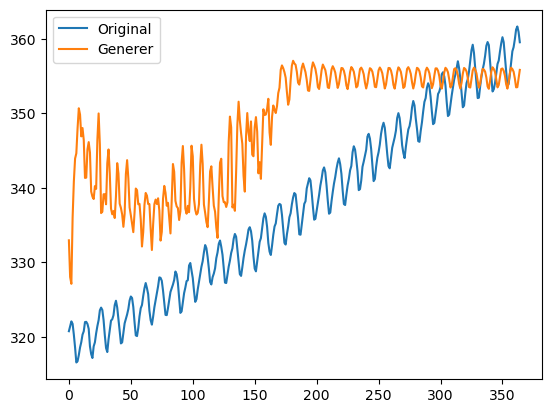

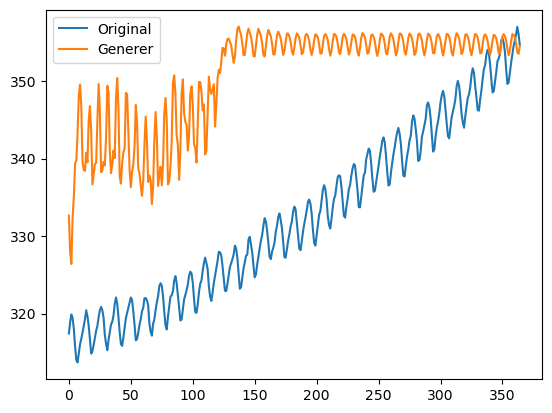

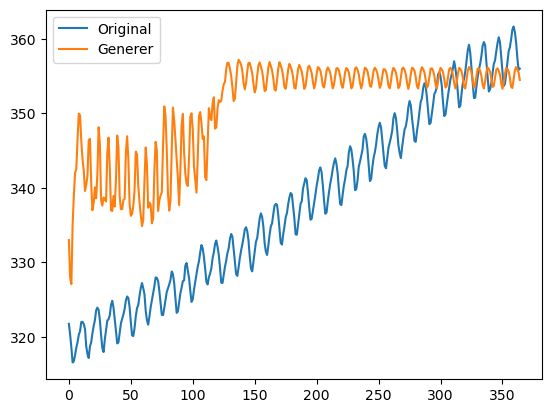

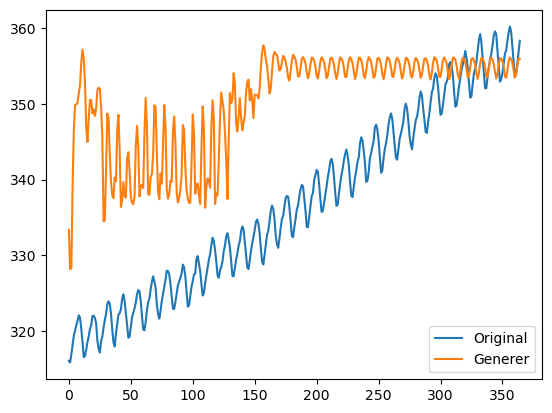

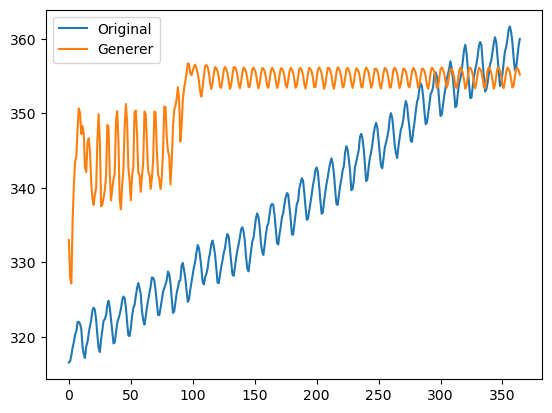

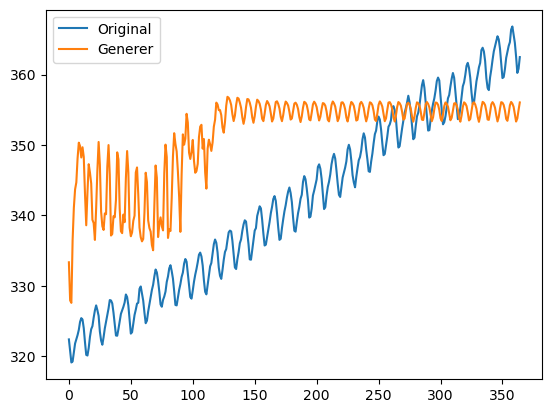

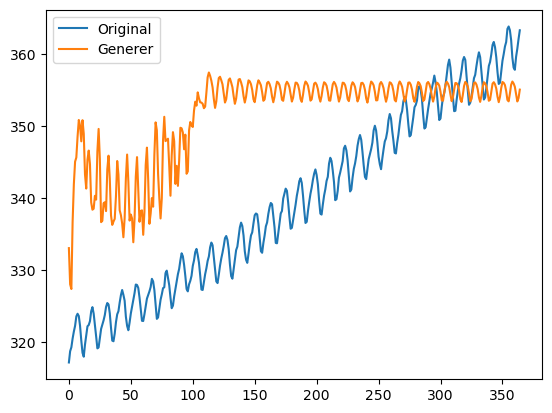

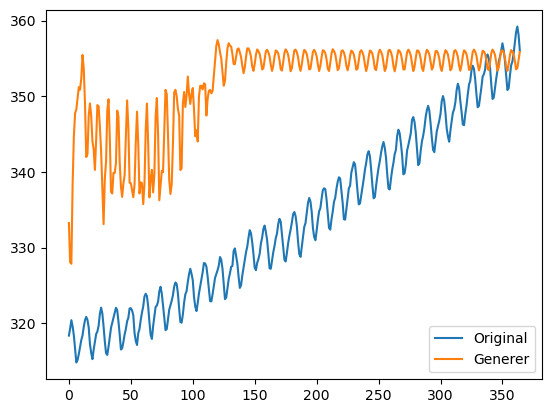

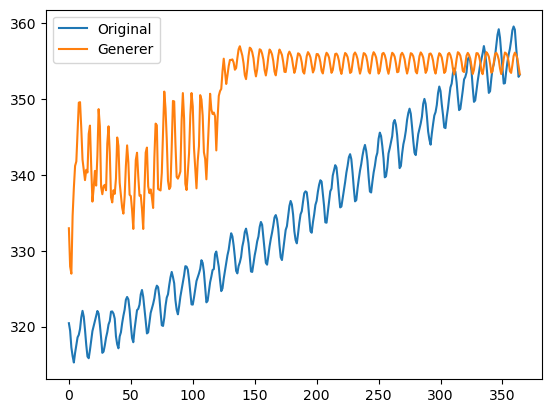

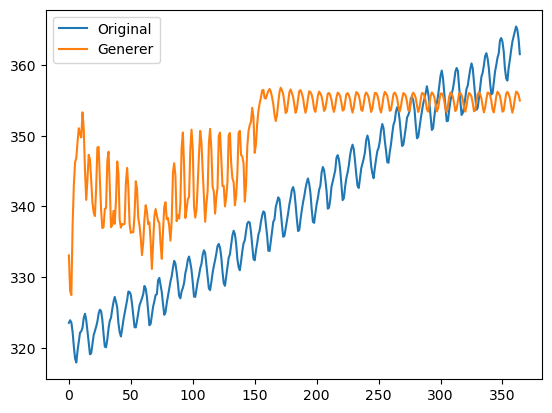

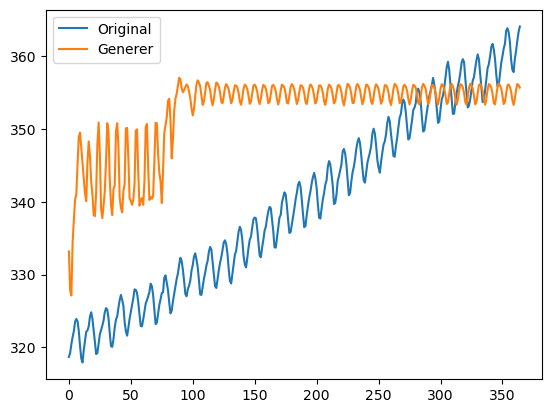

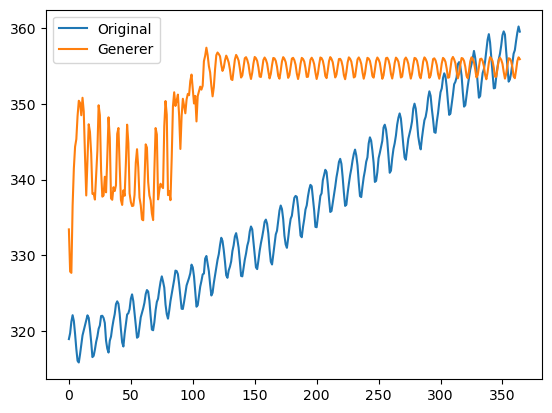

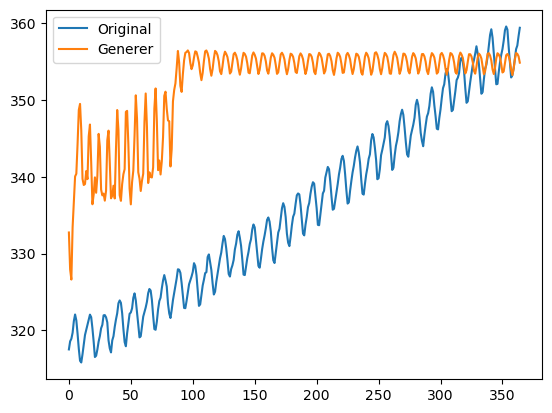

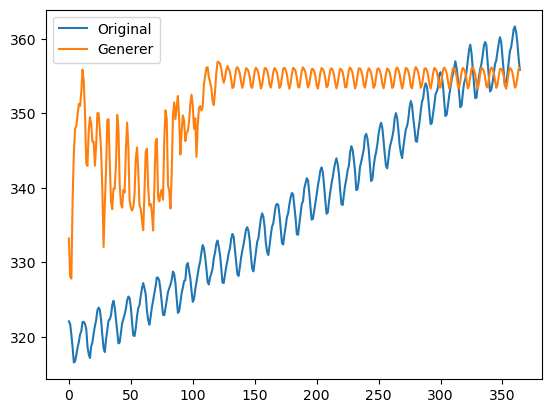

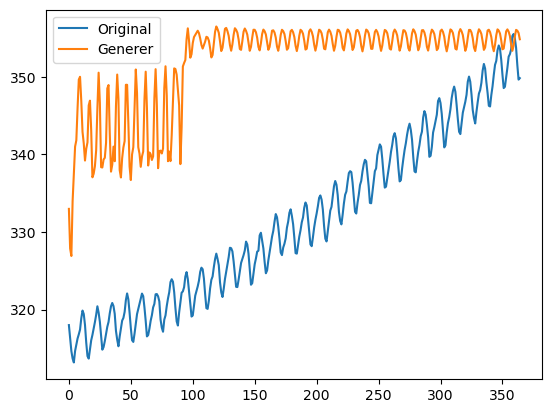

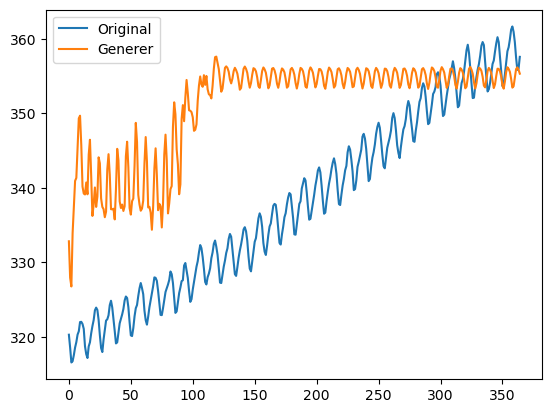

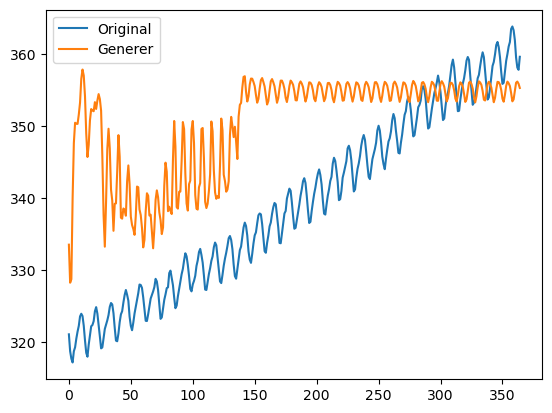

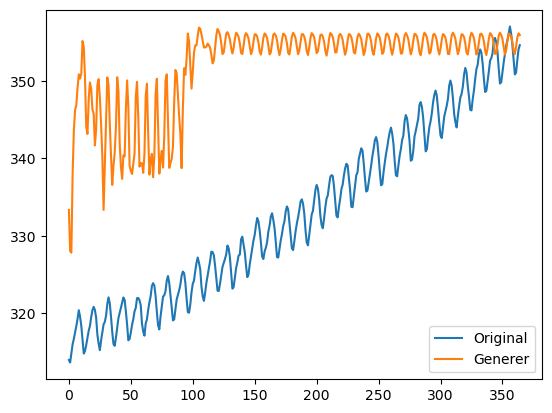

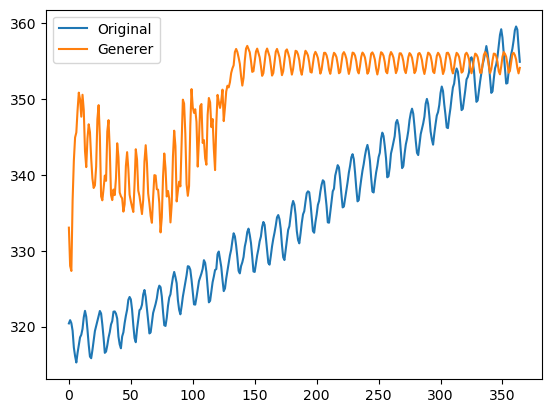

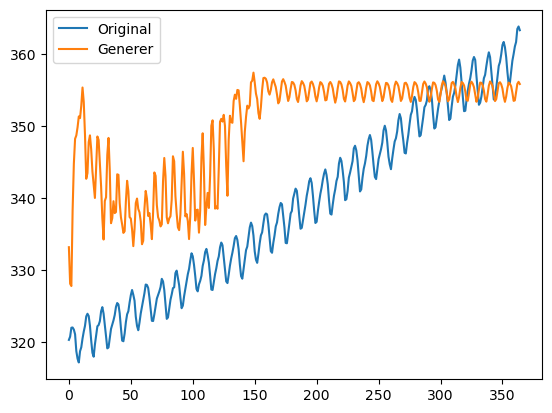

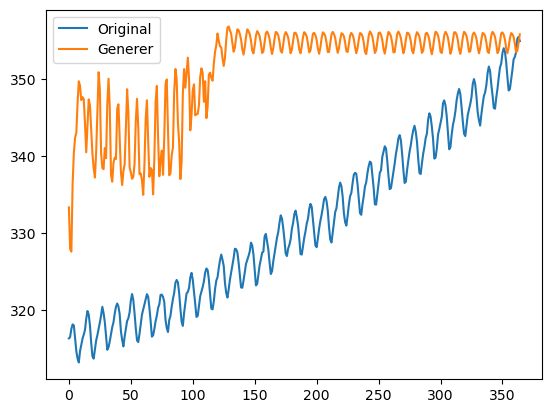

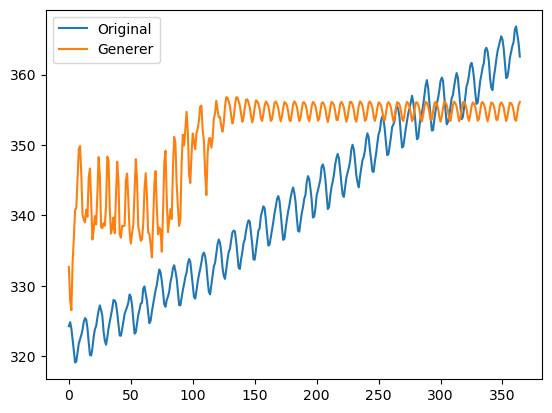

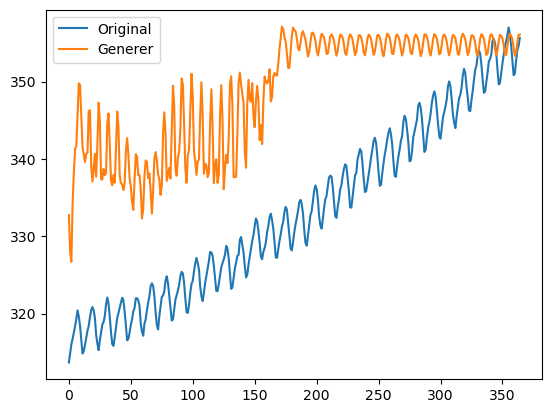

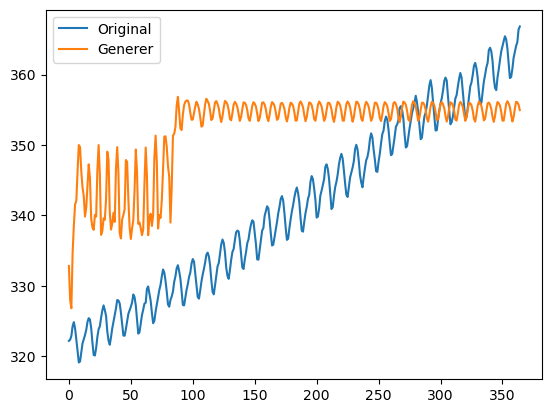

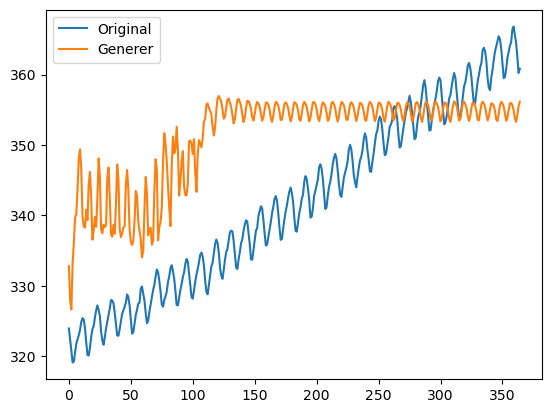

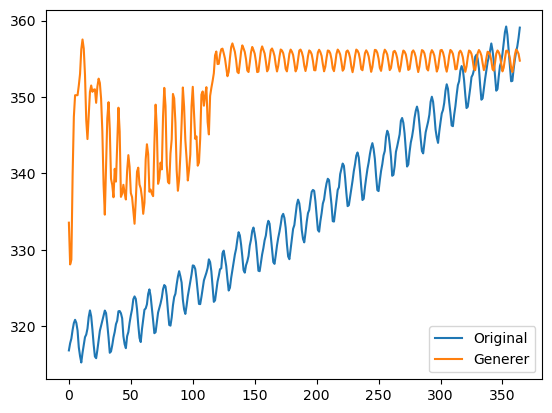

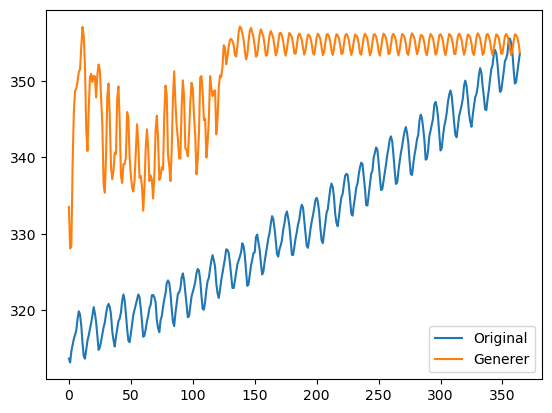

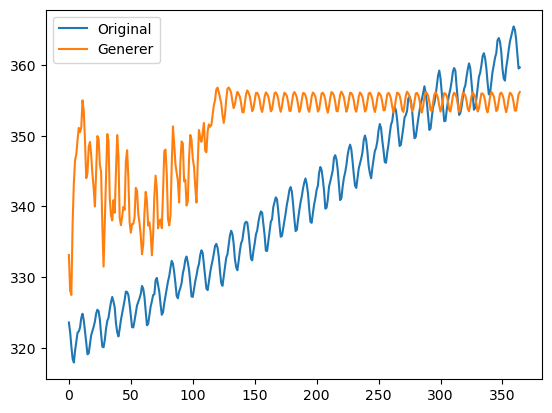

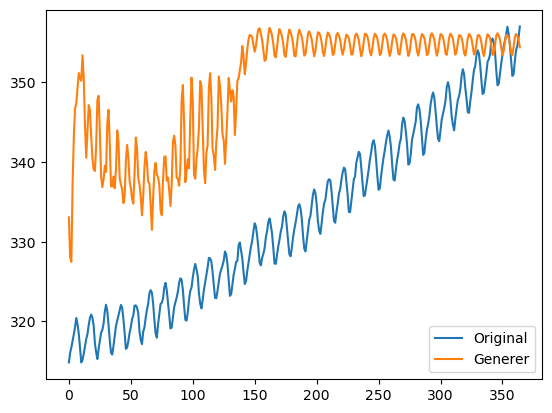

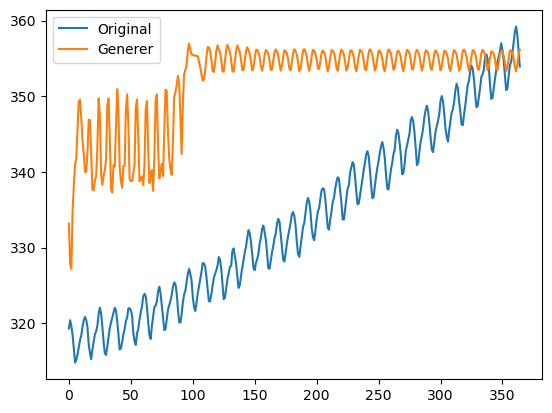

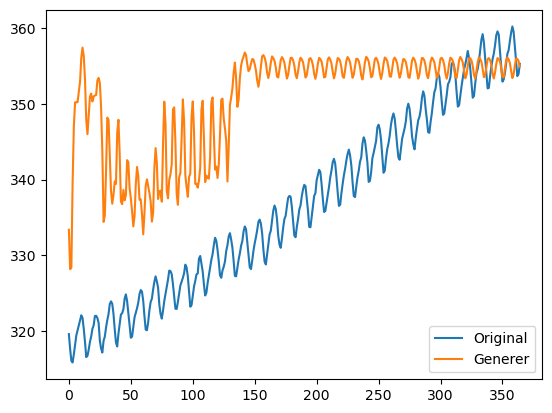

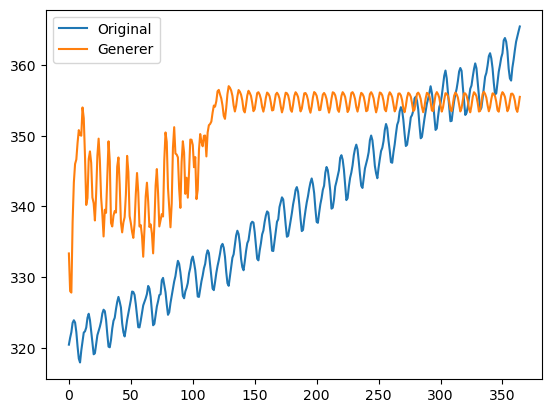

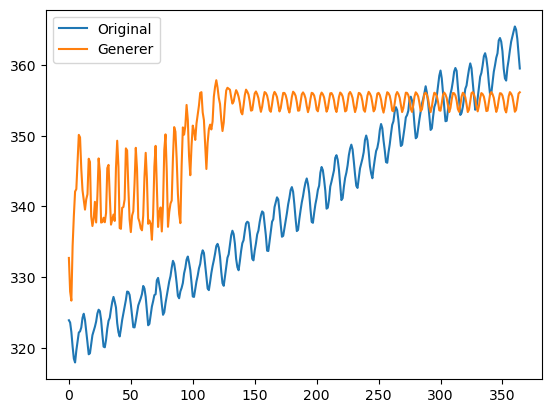

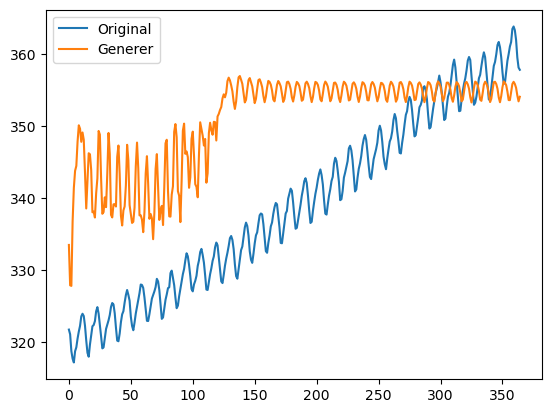

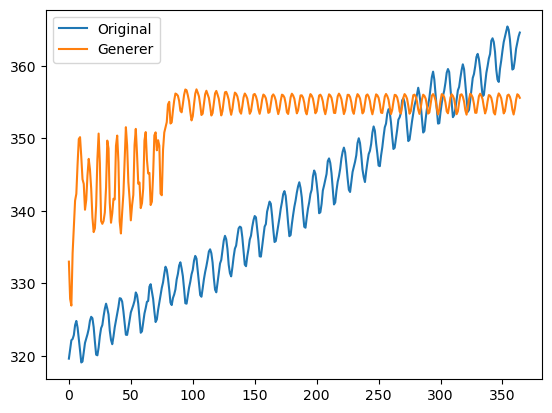

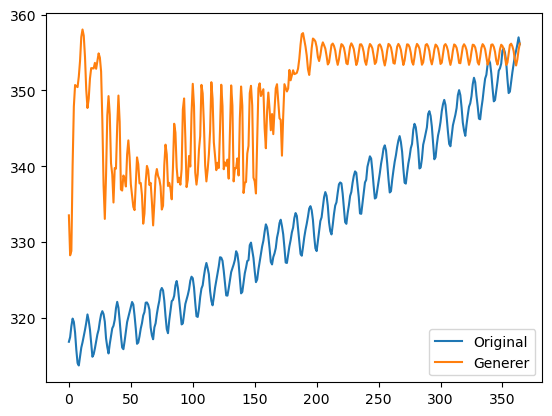

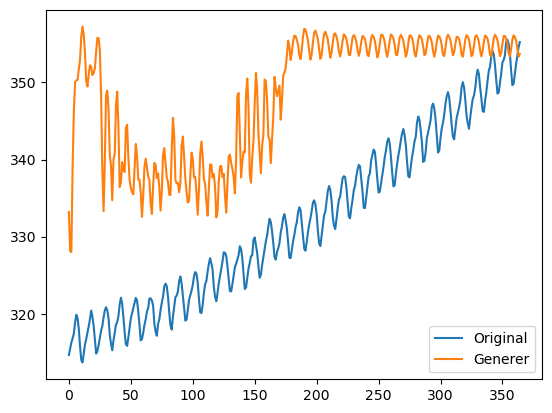

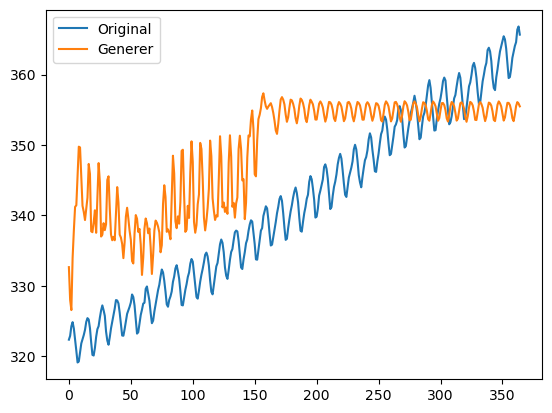

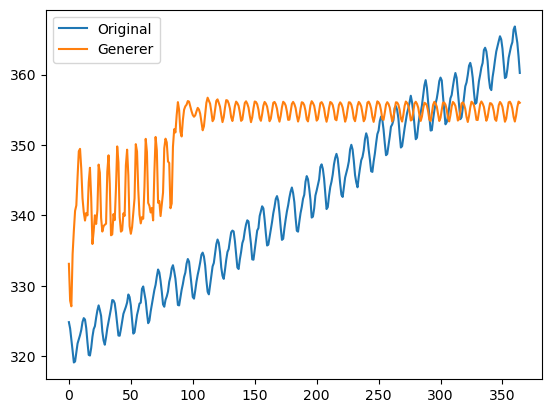

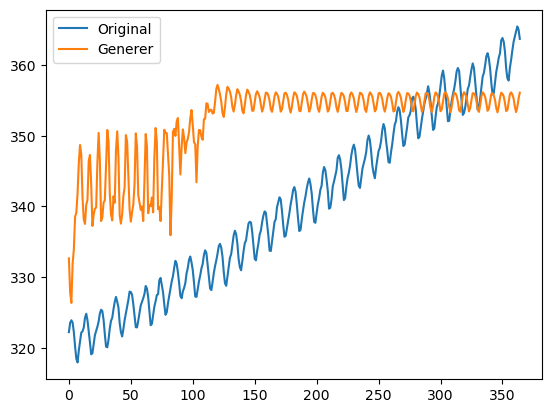

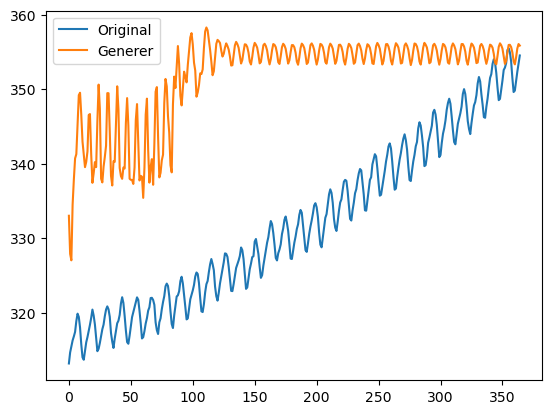

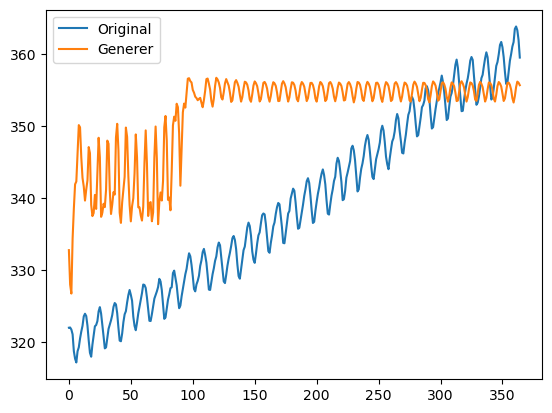

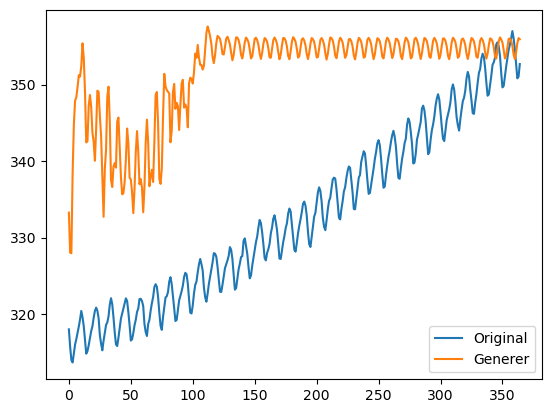

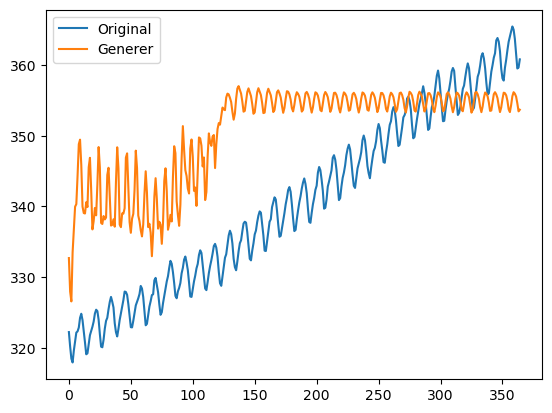

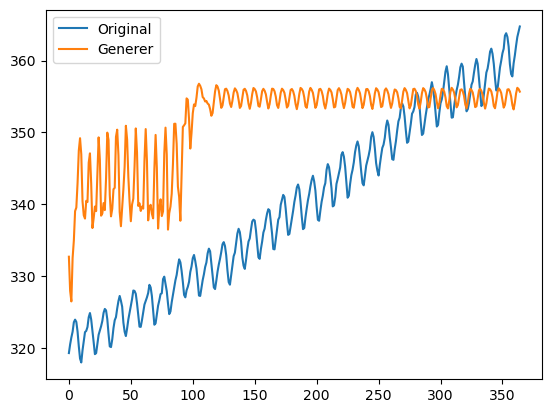

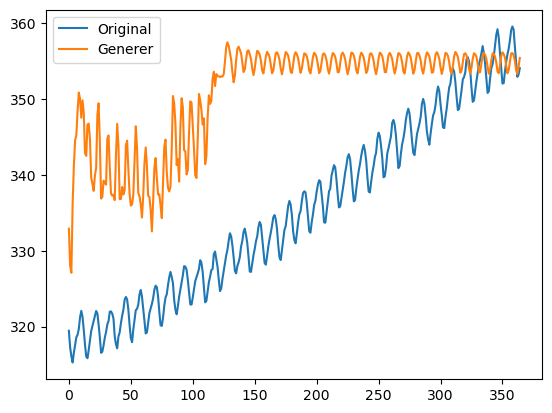

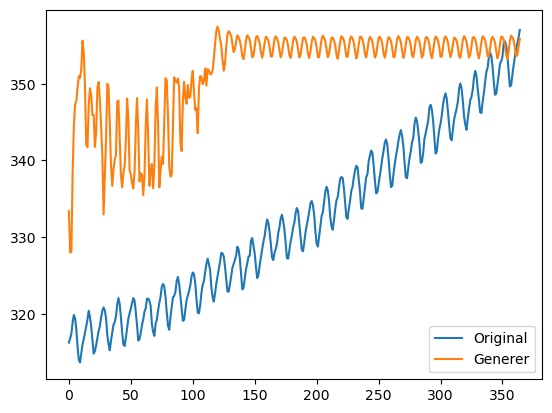

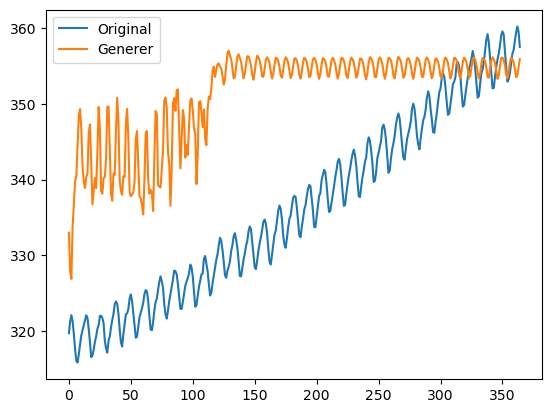

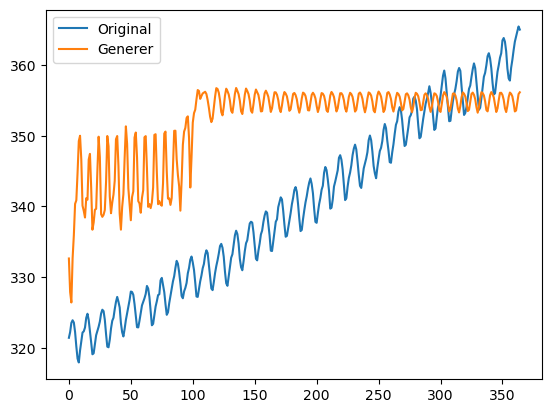

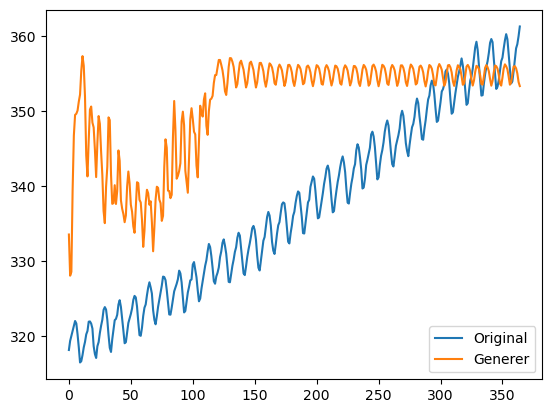

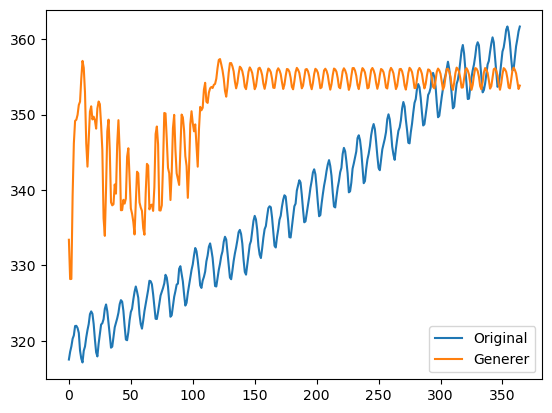

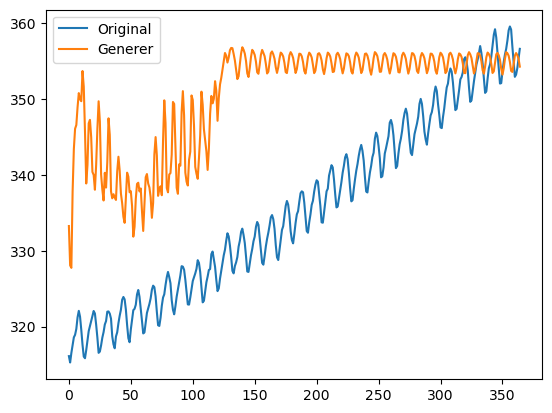

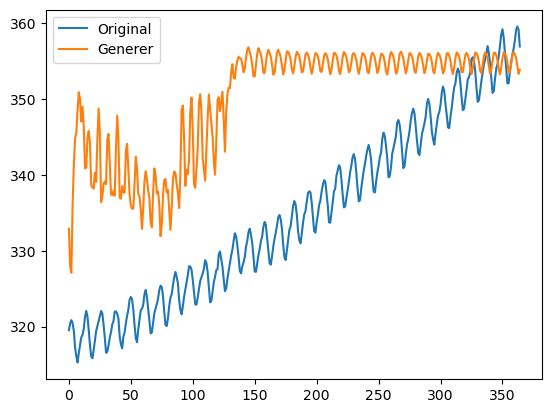

[]


In [9]:
import matplotlib.pyplot as plt

ori_data_deno = ori_data * (max_value - min_value) + min_value
generated_data_deno = generated_data * (max_value - min_value) + min_value

liste = np.empty((0,), dtype=np.ndarray)

for i in range(generated_data.shape[0]):
    temp = ori_data_deno[i]
    temp = np.squeeze(temp)
    temp2 = generated_data_deno[i]
    temp2 = np.squeeze(temp2)
    res = abs(np.corrcoef(temp, temp2)[0, 1])
    print(res)
    if(res>=0.6):
        print(res)
        # np.concatenate((liste,[temp2]))
        plt.figure()
        plt.plot(ori_data_deno[i], label='Original')
        plt.plot(generated_data_deno[i], label='Generer')
        plt.legend()
plt.show()
print(liste)

In [10]:
import numpy as np

flattened_array1 = ori_data_deno.reshape((-1, ori_data_deno.shape[-1]))
flattened_array2 = generated_data_deno.reshape((-1, generated_data_deno.shape[-1]))

# Spécifier le nom du fichier
f1 = 'output/ori_data.csv'
f2 = 'output/generated_data.csv'

# Utiliser la fonction savetxt pour enregistrer le tableau dans le fichier CSV
np.savetxt(f1, flattened_array1, delimiter=',')
np.savetxt(f2, flattened_array2, delimiter=',')

print("Le tableau a été enregistré dans le fichier CSV avec succès.")

Le tableau a été enregistré dans le fichier CSV avec succès.
